In [83]:
import numpy as np
import scipy.stats as scs
import scipy.linalg as scl
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from fitter import Fitter, get_common_distributions, get_distributions
import descartes
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point, Polygon

count    19177.000000
mean         0.164257
std          1.063319
min          0.020700
25%          0.079976
50%          0.108538
75%          0.144793
max         24.000000
Name: Travel_Time, dtype: float64
There is an outlier in the data. The time between dispatch and arrival for one of the entries was 24 hours, so this row was removed


(array([2.435e+03, 7.131e+03, 5.530e+03, 2.624e+03, 9.770e+02, 3.080e+02,
        8.400e+01, 3.700e+01, 1.000e+01, 3.000e+00]),
 array([0.02070011, 0.06456209, 0.10842406, 0.15228604, 0.19614801,
        0.24000999, 0.28387196, 0.32773394, 0.37159591, 0.41545789,
        0.45931986]),
 <BarContainer object of 10 artists>)

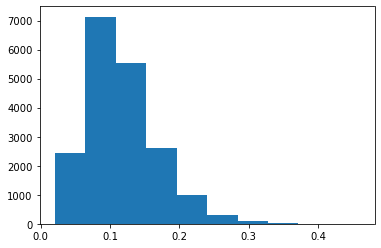

In [106]:
#Q4
amb_df = pd.read_csv('ProjectData-OHCAs.csv', index_col = [0])
amb_df['Travel_Time'] = amb_df['Amb_Arrival_Time'] - amb_df['Dispatch_Time']
print(amb_df['Travel_Time'].describe())
print("There is an outlier in the data. The time between dispatch and arrival for one of the entries was 24 hours, so this row was removed")
amb_df = amb_df[amb_df['Travel_Time']<24]
plt.hist(amb_df['Travel_Time'])
#print(amb_df['Travel_Time'].describe())

In [34]:
#Q4 fitting distribution
#Beta, Gamma, Lognormal, Exponential, Pareto, and Weibull

#list_of_dists = ['alpha','anglit','arcsine','beta','betaprime','bradford','burr','burr12','cauchy','chi','chi2','cosine','dgamma','dweibull','erlang','expon','exponnorm','exponweib','exponpow','f','fatiguelife','fisk','foldcauchy','foldnorm','genlogistic','genpareto','gennorm','genexpon','genextreme','gausshyper','gamma','gengamma','genhalflogistic','gilbrat','gompertz','gumbel_r','gumbel_l','halfcauchy','halflogistic','halfnorm','halfgennorm','hypsecant','invgamma','invgauss','invweibull','johnsonsb','johnsonsu','kstwobign','laplace','levy','levy_l','logistic','loggamma','loglaplace','lognorm','lomax','maxwell','mielke','nakagami','ncx2','ncf','nct','norm','pareto','pearson3','powerlaw','powerlognorm','powernorm','rdist','reciprocal','rayleigh','rice','recipinvgauss','semicircular','t','triang','truncexpon','truncnorm','tukeylambda','uniform','vonmises','vonmises_line','wald','weibull_min','weibull_max']
list_of_dists = ['beta', 'gamma', 'lognorm','expon','pareto','weibull_min','weibull_max']
results = []
for i in list_of_dists:
    dist = getattr(stats, i)
    param = dist.fit(amb_df['Travel_Time'])
    a = stats.kstest(amb_df['Travel_Time'], i, args=param)
    results.append((i,a[0],a[1]))
    
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

lognorm: statistic=0.006889863320311884, pvalue=0.3221463752492987
weibull_max: statistic=0.012992367908983782, pvalue=0.0030977763228222555
beta: statistic=0.03206382287859166, pvalue=1.5745849229598938e-17
weibull_min: statistic=0.032853706576045805, pvalue=2.2086027313718476e-18
gamma: statistic=0.42083404507706723, pvalue=0.0
expon: statistic=0.23929101483501813, pvalue=0.0
pareto: statistic=0.2666051998498139, pvalue=0.0


Fitting 7 distributions: 100%|██████████| 7/7 [00:00<00:00,  8.75it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,4.014323,201.737165,-162070.376734,inf,0.006890,3.221464e-01
beta,18.758872,473.761466,-132552.043982,inf,0.032064,1.574585e-17
weibull_min,22.541863,437.350926,-129045.928903,inf,0.032854,2.208603e-18
norm,88.211507,808.582533,-102943.239617,inf,0.070206,1.798487e-82
expon,650.100340,-8.403853,-64715.205852,inf,0.239291,0.000000e+00


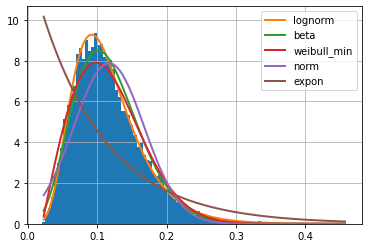

In [104]:
#Q4 with overlay on plot
f = Fitter(amb_df['Travel_Time'],distributions=['beta', 'gamma', 'lognorm','expon','pareto','weibull_min','norm'])
f.fit()
f.summary()

[Text(0.5, 1.0, 'Distribution of OHCA locations'),
 Text(0.5, 61.50502425000002, 'Longitude'),
 Text(57.875, 0.5, 'Latitude')]

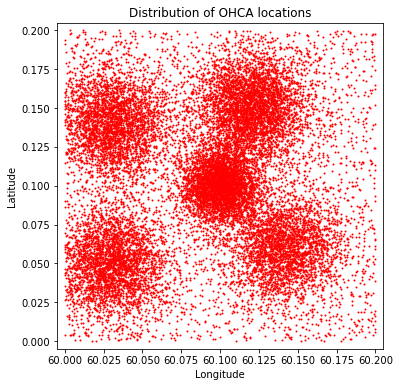

In [103]:
#Q5 scatter plot of the locations of all OHCAs
geometry = [Point(xy) for xy in zip(amb_df['Lon'],amb_df['Lat'])]
gdf = GeoDataFrame(amb_df, geometry = geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
plotted = gdf.plot(ax=world.plot(figsize=(10,6)),marker='o', color = 'red', markersize=1)
plotted.set_ylim(amb_df['Lat'].min()-0.005, amb_df['Lat'].max()+0.005)
plotted.set_xlim(amb_df['Lon'].min()-0.005, amb_df['Lon'].max()+0.005)
plotted.set(title='Distribution of OHCA locations', xlabel='Longitude', ylabel='Latitude')

In [ ]:
#Q6